In [13]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, START , END
from typing import TypedDict, Annotated, Literal
from dotenv import load_dotenv
from pydantic import BaseModel, Field


load_dotenv()
model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [4]:
class QuadState(TypedDict):

    a: int 
    b: int
    c:int
    equation : str
    discriminant : float
    result : str

In [5]:
def show_equation(state: QuadState):

    equation = f'{state['a']}x2{state['b']}x{state['c']}'

    return {'equation':equation}

def calculate_discriminant(state: QuadState):

    discriminant = state['b']**2 - (4*state['a']*state['c'])

    return {'discriminant':discriminant}

In [26]:
def real_roots(state: QuadState):
    root1 = (-state['b'] + state['discriminant']**0.5/(2*state['a']))
    root2 = (-state['b'] - state['discriminant']**0.5/(2*state['a']))

    result = f'The roots are {root1} and {root2}'

    return {'result':result}

def repeated_roots(state: QuadState):
    root = (-state['b'])/(2*state['a'])

    result = f'Only repeating root is {root}'

    return {'result':result}

def no_real_roots(state: QuadState):
    result = f'No real roots.'

    return {'result':result}

def check_condition(state:QuadState) -> Literal['real_roots','repeated_roots','no_real_roots']:
    
    if state['discriminant'] > 0:
        return 'real_roots'
    elif state['descriminant'] == 0:
        return 'repeated_roots'
    else:
        return 'no_real_roots'


In [27]:
graph = StateGraph(QuadState)
# ------------- Nodes --------------
graph.add_node('show_eqaution',show_equation)
graph.add_node('calculate_discriminant',calculate_discriminant)
graph.add_node('real_roots',real_roots)
graph.add_node('repeated_roots',repeated_roots)
graph.add_node('no_real_roots',no_real_roots)

# ------------ Edges --------------
graph.add_edge(START,'show_eqaution')
graph.add_edge('show_eqaution','calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant',check_condition)

graph.add_edge('real_roots',END)
graph.add_edge('repeated_roots',END)
graph.add_edge('no_real_roots',END)

workflow = graph.compile()


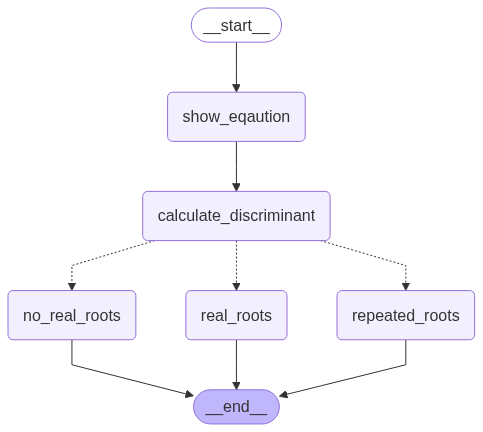

In [28]:
workflow

In [29]:
initial_state = {
    'a':4,
    'b':-5,
    'c':-4
}

workflow.invoke(initial_state)

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x2-5x-4',
 'discriminant': 89,
 'result': 'The roots are 6.179247641507075 and 3.820752358492925'}